In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
from citipy import citipy

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [26]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | blairgowrie
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 5 of Set 1 | amderma
City not found. Skipping...
Processing Record 6 of Set 1 | sur
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | ozernovskiy
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | stokmarknes
Processing Record 14 of Set 1 | kirkuk
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | sorland
Processing Record 21 of Set 1 | t

Processing Record 35 of Set 4 | tarauaca
Processing Record 36 of Set 4 | victoria
Processing Record 37 of Set 4 | bac lieu
Processing Record 38 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 39 of Set 4 | takoradi
Processing Record 40 of Set 4 | saint anthony
Processing Record 41 of Set 4 | katangli
Processing Record 42 of Set 4 | antalaha
Processing Record 43 of Set 4 | vardo
Processing Record 44 of Set 4 | port hardy
Processing Record 45 of Set 4 | ballina
Processing Record 46 of Set 4 | korla
Processing Record 47 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 48 of Set 4 | kumluca
Processing Record 49 of Set 4 | maple creek
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | alofi
Processing Record 2 of Set 5 | palauig
Processing Record 3 of Set 5 | pagsangahan
Processing Record 4 of Set 5 | nome
Processing Record 5 of Set 5 | souillac
Processing Record 6 of Set 5 | la palma
Processing Record 7 of Set 5 | salalah
Pr

Processing Record 22 of Set 8 | kitsuki
Processing Record 23 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 24 of Set 8 | staryy nadym
Processing Record 25 of Set 8 | isangel
Processing Record 26 of Set 8 | ngunguru
Processing Record 27 of Set 8 | cockburn town
Processing Record 28 of Set 8 | russkaya polyana
Processing Record 29 of Set 8 | mikkeli
Processing Record 30 of Set 8 | talnakh
Processing Record 31 of Set 8 | dawei
Processing Record 32 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 33 of Set 8 | cidreira
Processing Record 34 of Set 8 | atar
Processing Record 35 of Set 8 | adeje
Processing Record 36 of Set 8 | mar del plata
Processing Record 37 of Set 8 | cabo san lucas
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | fort nelson
Processing Record 40 of Set 8 | ixtapa
Processing Record 41 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 42 of Set 8 | touros
Processing Record 43 of Set 8 | cot

Processing Record 6 of Set 12 | japura
Processing Record 7 of Set 12 | numan
Processing Record 8 of Set 12 | darovskoy
Processing Record 9 of Set 12 | atambua
Processing Record 10 of Set 12 | ishigaki
Processing Record 11 of Set 12 | campina verde
Processing Record 12 of Set 12 | monticello
Processing Record 13 of Set 12 | port lincoln
Processing Record 14 of Set 12 | usinsk
Processing Record 15 of Set 12 | vila franca do campo
Processing Record 16 of Set 12 | yamada
Processing Record 17 of Set 12 | yavatmal
Processing Record 18 of Set 12 | limulunga
Processing Record 19 of Set 12 | tonj
Processing Record 20 of Set 12 | cartagena
Processing Record 21 of Set 12 | castro
Processing Record 22 of Set 12 | muros
Processing Record 23 of Set 12 | timra
Processing Record 24 of Set 12 | san roque
Processing Record 25 of Set 12 | nuevo progreso
Processing Record 26 of Set 12 | anaconda
Processing Record 27 of Set 12 | mahibadhoo
Processing Record 28 of Set 12 | rio grande
Processing Record 29 of

In [20]:
 print(len(city_data))

546


In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,39.72,41,1,5.01,CA,2021-05-25 01:51:29
1,Blairgowrie,56.5916,-3.3405,46.02,82,100,1.01,GB,2021-05-25 01:51:29
2,Jamestown,42.0970,-79.2353,66.85,94,91,1.70,US,2021-05-25 01:48:33
3,Sur,22.5667,59.5289,88.52,49,2,11.39,OM,2021-05-25 01:51:30
4,Puerto Ayora,-0.7393,-90.3518,74.55,89,59,5.01,EC,2021-05-25 01:51:30
5,Ozernovskiy,51.5000,156.5167,40.66,81,100,8.95,RU,2021-05-25 01:51:31
6,Whitehorse,60.7161,-135.0538,50.77,66,75,9.22,CA,2021-05-25 01:48:34
7,Albany,42.6001,-73.9662,63.18,59,52,5.77,US,2021-05-25 01:50:58
8,Hilo,19.7297,-155.0900,82.13,76,1,14.97,US,2021-05-25 01:48:24
9,Stokmarknes,68.5646,14.9108,42.49,74,2,7.23,NO,2021-05-25 01:51:31


In [24]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-05-25 01:51:29,62.4560,-114.3525,39.72,41,1,5.01
1,Blairgowrie,GB,2021-05-25 01:51:29,56.5916,-3.3405,46.02,82,100,1.01
2,Jamestown,US,2021-05-25 01:48:33,42.0970,-79.2353,66.85,94,91,1.70
3,Sur,OM,2021-05-25 01:51:30,22.5667,59.5289,88.52,49,2,11.39
4,Puerto Ayora,EC,2021-05-25 01:51:30,-0.7393,-90.3518,74.55,89,59,5.01
5,Ozernovskiy,RU,2021-05-25 01:51:31,51.5000,156.5167,40.66,81,100,8.95
6,Whitehorse,CA,2021-05-25 01:48:34,60.7161,-135.0538,50.77,66,75,9.22
7,Albany,US,2021-05-25 01:50:58,42.6001,-73.9662,63.18,59,52,5.77
8,Hilo,US,2021-05-25 01:48:24,19.7297,-155.0900,82.13,76,1,14.97
9,Stokmarknes,NO,2021-05-25 01:51:31,68.5646,14.9108,42.49,74,2,7.23


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

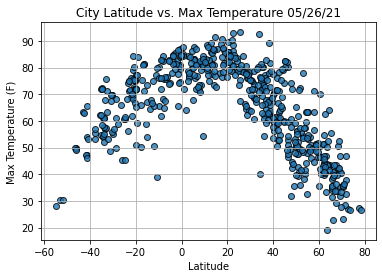

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

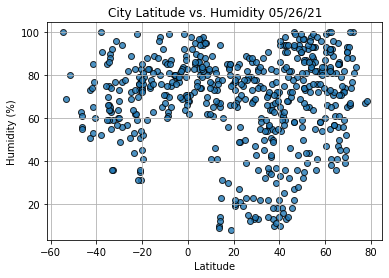

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

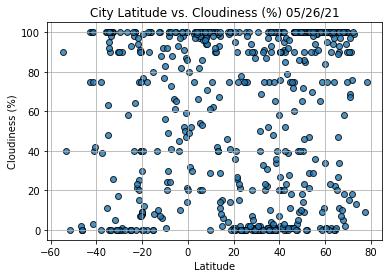

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

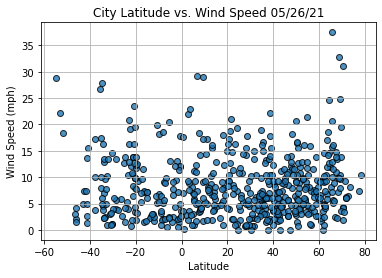

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()